## CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("./reading_data/USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
!pip install yellowbrick

In [8]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\darak\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


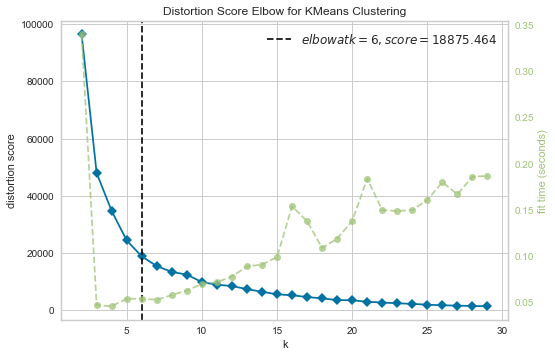

In [9]:
kmean = KMeans()
visualizer = KElbowVisualizer(kmean,k=(2,30)).fit(df)
visualizer.poof()

In [10]:
kmean = KMeans(n_clusters=6).fit(df)

In [11]:
kmean.labels_

array([1, 1, 4, 5, 1, 5, 2, 1, 4, 5, 0, 2, 1, 2, 0, 2, 2, 1, 0, 4, 3, 1,
       0, 1, 5, 2, 2, 1, 0, 3, 1, 1, 4, 0, 2, 3, 3, 2, 3, 1, 0, 5, 5, 2,
       0, 3, 3, 0, 0, 3])

In [12]:
df["Cluster"]=kmean.labels_

In [13]:
df

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,5
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,4
Georgia,17.4,211,60,25.8,5


## HIERARCHICAL CLUSTERING

In [5]:
from scipy.cluster.hierarchy import linkage

In [6]:
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")

In [10]:
from scipy.cluster.hierarchy import dendrogram

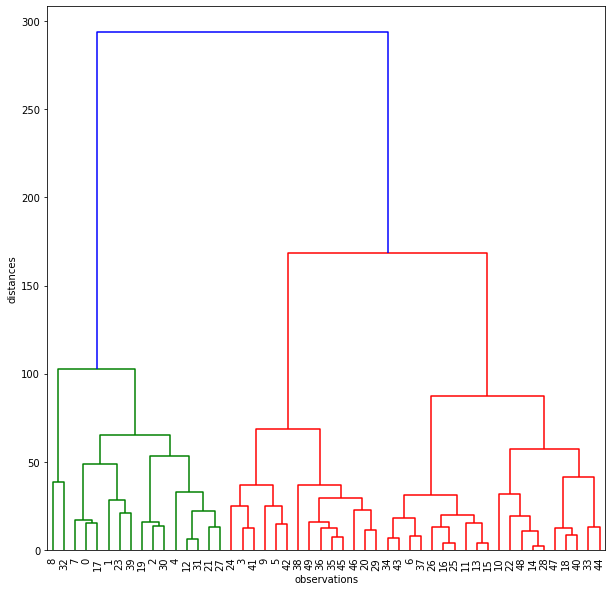

In [15]:
plt.figure(figsize=(10,10))
plt.xlabel("observations")
plt.ylabel("distances")
dendrogram(hc_complete,leaf_font_size=10);

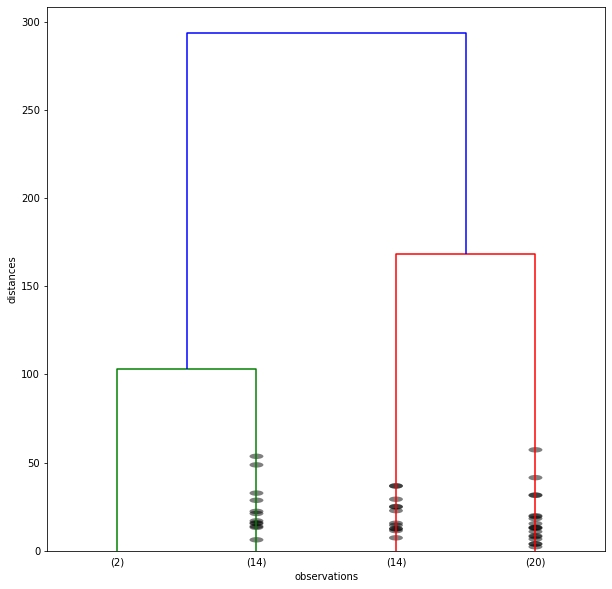

In [65]:
plt.figure(figsize=(10,10))
plt.xlabel("observations")
plt.ylabel("distances")
dendrogram(hc_complete,truncate_mode="lastp",p=4,show_contracted=True,leaf_font_size=10);

## PCA(Principle Component Analysis)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
df = StandardScaler().fit_transform(df)

In [45]:
pca = PCA(n_components = 3)
pca_fit =pca.fit_transform(df)

In [46]:
pd.DataFrame(pca_fit,columns=["First Component","Second Component","Third Component"])

,First Component,Second Component,Third Component
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557
5,1.514563,-0.987555,1.095007
6,-1.358647,-1.088928,-0.643258
7,0.047709,-0.325359,-0.718633
8,3.013042,0.039229,-0.576829
9,1.639283,1.278942,-0.342460


In [37]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [42]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791]])

In [59]:
?sklearn.fit_transform

Object `sklearn.fit_transform` not found.


Text(0, 0.5, 'Cumilative sum of explainment')

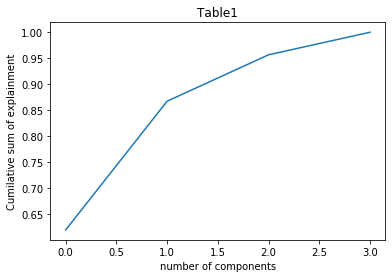

In [63]:
#OPTIMUM COMPONENT NUMBER
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Table1")
plt.xlabel("number of components")
plt.ylabel("Cumilative sum of explainment")